# Fraud Detection Using Self Organizing Map


In [10]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [11]:
# Importing the dataset
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [12]:
dataset.head()

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.46,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.00,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.75,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.50,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.17,2,6,4,1.960,1,1,14,0,2,60,159,1


In [13]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)

In [14]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.5)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

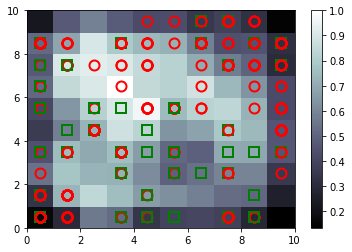

In [26]:
# Visualizing the results
# Outlier points are the customers who are fradulent as there is a anomaly in their behavior.
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
# From the result below we can observe that the dark nodes are the wining nodes and the darker shaded nodes surrounding them are the ones which are closely representing the wining node features. while the white blocks represent 
# that they are outliers and can be classified as fradulent people.
# we can distinguish people who got approval and who did not from the bank. our aim is to detect customers with bank approval and are fraudulent in nature. 
# Red circles depict the customers who did not get approval and green represents customers who got approval from the bank
# Circles represent customers with No approval and Square represents customers with Aproval.

In [29]:
# Finding the frauds
# to get the explicit customer list who have comitted to this fraud
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(3,7)], mappings[(4,5)]), axis = 0)
frauds = sc.inverse_transform(frauds)

In [30]:
np.set_printoptions(suppress=True)
frauds
# from the results below we can observe the customers(customerID) who have received the approval from bank and are fradulent.


array([[ 15748691.   ,         1.   ,        36.08 ,         2.54 ,
                2.   ,         1.   ,         1.   ,         0.   ,
                0.   ,         0.   ,         0.   ,         0.   ,
                2.   ,         0.   ,      1001.   ],
       [ 15727811.   ,         1.   ,        18.58 ,        10.29 ,
                2.   ,         1.   ,         1.   ,         0.415,
                0.   ,         0.   ,         0.   ,         0.   ,
                2.   ,        80.   ,         1.   ],
       [ 15767264.   ,         1.   ,        74.83 ,        19.   ,
                1.   ,         1.   ,         1.   ,         0.04 ,
                0.   ,         1.   ,         2.   ,         0.   ,
                2.   ,         0.   ,       352.   ],
       [ 15761854.   ,         1.   ,        31.25 ,         2.835,
                2.   ,         1.   ,         1.   ,         0.   ,
                0.   ,         1.   ,         5.   ,         0.   ,
                2.   ,